In [1]:
from matplotlib import pyplot as plt
import torch as tc
from torch import nn
from torch import optim
from torch.nn import functional as F
import torchvision as tv
from torchvision import transforms
from torchvision import datasets as d
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Subset
from scipy.signal import fftconvolve

import random
from tqdm.notebook import tqdm
from collections import deque, namedtuple

device = tc.device('cuda:0')

In [2]:
# データは num = 0の画像のみ
transform = transforms.Compose([transforms.ToTensor()])
whole_trainset = d.MNIST(root='./data', train=True, download=True, transform=transform)
# train_mask = (whole_trainset.targets == 0).nonzero()[:, 0]
# trainset = Subset(whole_trainset, train_mask)

whole_testset = d.MNIST(root='./data', train=False, download=True, transform=transform)
# test_mask  = (whole_testset.targets == 0).nonzero()[:, 0]
# testset = Subset(whole_testset, test_mask)
trainloader = DataLoader(whole_trainset, shuffle=True)
testloader = DataLoader(whole_testset, shuffle=False)

In [3]:
import numpy as np
from scipy.stats import multivariate_normal
from skimage.restoration import wiener

# 準備するフィルタのサイズを5x5に固定
X, Y = np.meshgrid(np.arange(-2, 3, 1, dtype=np.float32), np.arange(-2, 3, 1, dtype=np.float32))
gauss_filters = []
std = 0.8
f = np.vectorize(
    lambda x, y: multivariate_normal([0.0, 0.0], np.diag([std]*2)).pdf([x, y])
)
kernel = f(X, Y)
kernel = kernel / kernel.sum()
kernel = kernel.astype(np.float32)
gauss1 = kernel

tc.random.manual_seed(0)
kernel = tc.rand((5, 5))
kernel = kernel / kernel.sum()
random1 = kernel

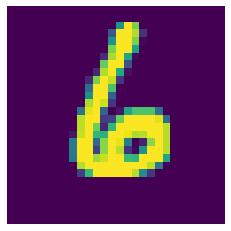

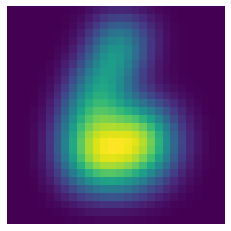

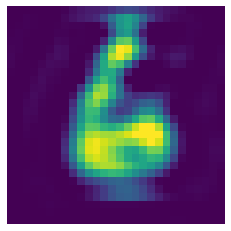

In [12]:
# gauss, random, gaussを復元できるか
img, _ = next(iter(trainloader))
img = img[0][0]
plt.imshow(img)
plt.axis('off')
plt.show()

dec = img
filters = [gauss1, random1, gauss1, random1, gauss1]
for kernel in filters:
    dec = fftconvolve(dec, kernel, mode='same')

plt.imshow(dec)
plt.axis('off')
plt.show()

res = dec
for kernel in filters:
    res = np.maximum(0.0, wiener(res, kernel, 1e-2))
    
plt.imshow(res)
plt.axis('off')
plt.show()